# Intoduction
Data can be categorized in various ways as below. It's critical to find out the kind of data you have so that you can select the right anomaly detection algorithm. You need to ask your self the following questions
* Is the data multivariate or univariate. In other words if have multiple data sets are they cross correlated or not. For example if set of viv=bration sensor data data form a rotating machinary, they are likely to be cross correlated
* If univariate, is it auto correlated or auto regressive. By that I mean is the data values is a function of recent past values. If the data has seasonal cycle or trend it's always auto regressive
* If it's not auto regressive, is the distribution Gasussian

You can answer all these questions by doing data data exploration. I will be heavily using a [python data exploration tool](https://pkghosh.wordpress.com/2020/07/13/learn-about-your-data-with-about-seventy-data-exploration-functions-all-in-one-python-class/) I implemented with around 70 data exploration functions. It consolidates various data exploration functions from numpy, scipy, pandas, statsmodels and scikit-learn all in one place.

Please checkout my Github repo [avenir](https://github.com/pranab/avenir). All the code used here is from this repository. You only need all the content under python and resoure directory in that rep. All the note book content should be in a directory under python and you should start jupyter from that directory.

# Environment

You will need Python3. I am using Python 3.8. These are the python modules needed

* ipython                   7.17.0
* ipython-genutils          0.2.0
* ipywidgets                7.5.1
* joblib                    0.16.0
* jprops                    2.0.2
* jsonschema                3.2.0
* jupyter                   1.0.0
* jupyter-client            6.1.6
* jupyter-console           6.1.0
* jupyter-core              4.6.3
* matplotlib                3.3.0
* nbconvert                 5.6.1
* nbformat                  5.0.7
* notebook                  6.1.3
* numpy                     1.19.1
* pandas                    1.1.0
* qtconsole                 4.7.6
* QtPy                      1.9.0
* scikit-learn              0.23.1
* scipy                     1.5.2
* sklearn                   0.0
* statsmodels               0.11.1


# Data generation
Please do the following
* Copy tsgen.py from python/app directory to python/nbook directory
* Copy all properties file with names starting with tsgen as tsgen*.properties fron resource directory to python/nbook directory
* You can keep the parameter settings or change if you like e.g you may want data over a longer period.


# Random gaussian
Our first exploration task is for random gaussian data. The data is temperature sensor data from a temterature controlled building. The temerature is steady at 70 deg with some random zro mean gaussian noise. generate data as follows

*./tsgen.py rg  tsgen.properties  tsgen_tmpsens.properties > tmpsens.txt*

The first confguration file in command line argument has all the configuration parameters defined. With the second configuration file you can override some of the parameters.


== adding numeric columns from a file ==
done

== plotting data for data sets val ==


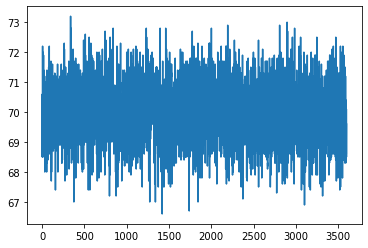


== plotting histogram for data sets val ==


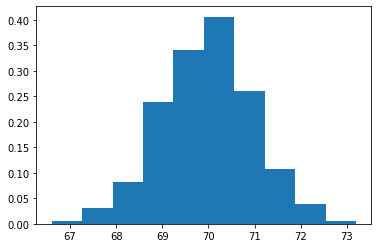


== plotting auto correlation for data sets val ==


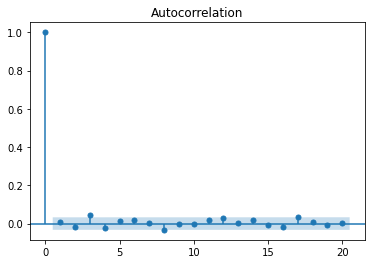

In [1]:
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

#temp sensor data from temp controlled environment
exp = DataExplorer()
exp.addFileNumericData("tmpsens.txt", 1, "sensor")
exp.plot("sensor")
exp.plotHist("sensor", False, True)
exp.plotAutoCorr("sensor", 20, .05)


The histogram looks like a normal distribution. As expected the auto correlation has peak at 0 lag and then it sharply falls to near zero values for othersr lags. Next we will run some test for normalcy. 


In [2]:
exp.testNormalShapWilk("val")


== doing shapiro wilks normalcy test for data sets val ==
result details:
{'pvalue': 0.003962025046348572, 'stat': 0.9986228346824646}

test result:
stat:   0.999
pvalue: 0.004
significance level: 0.050
probably not gaussian


{'stat': 0.9986228346824646, 'pvalue': 0.003962025046348572}

With alpha of .05, the p value is wihin range. So the null hypothesis that that the data normal distribution is valid.

# Random with non parameteric distribution
Next we will work random data with non paramteric distribution. The data is incoming TCP SYN packet rate. Generally under DOS attack, the rate goes high outside normal range. You should run the following command in your notebook directory to generate the data

*./tsgen.py rnp  tsgen.properties  tsgen_sflood.properties > sflood.txt*




== adding numeric columns from a file ==
done

== plotting data for data sets sflood ==


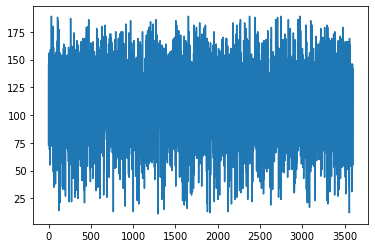


== plotting histogram for data sets sflood ==


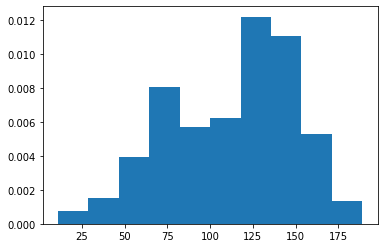


== plotting auto correlation for data sets sflood ==


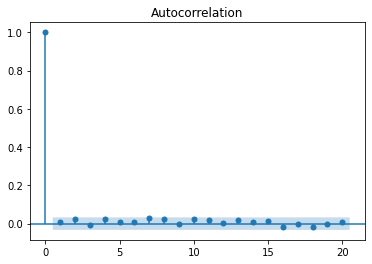

In [3]:
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sflood.txt", 1, "sflood")
exp.plot("sflood")
exp.plotHist("sflood", False, True)
exp.plotAutoCorr("sflood", 20, .05)

As expected, the distribution is not normal. The auto correlation has a peak at zero lag as expected for random data. Fpr rest of the lags the auto coreelation is neraly zero. The conclusion we draw is that we can not use anomaly detection algorithms that are based on the assumtion of data having a normal distribution. Next we will run normalcy test on the data, but this time we will use a different test.

In [1]:
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("sflood.txt", 1, "sflood")
exp.testNormalJarqBera("sflood")


== adding numeric columns from a file ==
done

== doing ajrque bera normalcy test for data sets sflood ==
result details:
{   'kurtosis': 2.3312236427562123,
    'pvalue': 1.7633420322593389e-34,
    'skew': -0.3837362204725141,
    'stat': 155.44136454275852}

test result:
stat:   155.441
pvalue: 0.000
significance level: 0.050
probably not gaussian


{'stat': 155.44136454275852,
 'pvalue': 1.7633420322593389e-34,
 'skew': -0.3837362204725141,
 'kurtosis': 2.3312236427562123}

We have a very small pvalue, rejecting the null hypothesis. So it is confirmed that the data does not have a normal distribution as we saw visually in the histogram.

# Auto regressive 
We wil use auto regressive data i.e a data value is a function of the past 2 values. We will see how can detect auto regressive data through auto correlation and partial auto correlation. Generate data as below

*./tsgen.py ar  tsgen.properties  tsgen_bp.properties > bp.txt*


== adding numeric columns from a file ==
done

== plotting data for data sets bp ==


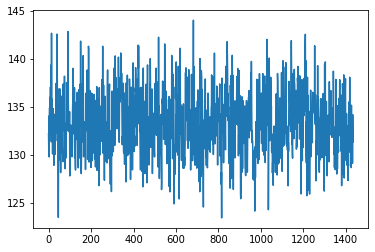


== plotting histogram for data sets bp ==


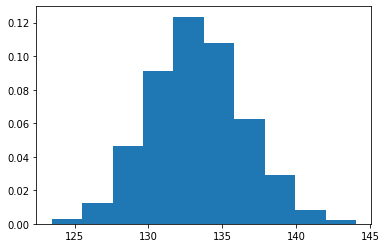

In [3]:
from matplotlib import pyplot
sys.path.append(os.path.abspath("../lib"))
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("bp.txt", 1, "bp")
exp.plot("bp")
exp.plotHist("bp", False, True)

The data distribution a central tendency. Let's do a normalcy test.


In [4]:
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("bp.txt", 1, "bp")
exp.testNormalShapWilk("bp")


== adding numeric columns from a file ==
done

== doing shapiro wilks normalcy test for data sets bp ==
result details:
{'pvalue': 0.13621439039707184, 'stat': 0.9982330203056335}

test result:
stat:   0.998
pvalue: 0.136
significance level: 0.050
probably gaussian


{'stat': 0.9982330203056335, 'pvalue': 0.13621439039707184}

Turns out the data has a normal distribution. With a large pvalue we can not reject the null hypothesis of normal distribution. Let's try auto correlation and partial auto correlation.


== adding numeric columns from a file ==
done

== plotting auto correlation for data sets bp ==


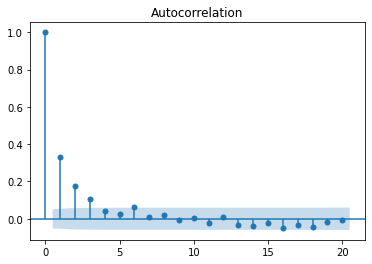


== plotting partial auto correlation for data sets bp ==


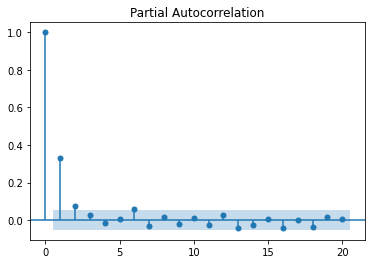

In [5]:
from matplotlib import pyplot
sys.path.append(os.path.abspath("../mlextra"))
from daexp import *

exp = DataExplorer()
exp.addFileNumericData("bp.txt", 1, "bp")
exp.plotAutoCorr("bp", 20, .05)
exp.plotParAcf("bp", 20, .05)

Both auto correlation and partial auto correlation has significant peaks as non zero lags as expected from auto regressive data. Auto correlation has more  than 2 significant peaks, because past values beyond the second contribute to the current value indirectly, although data is is generated with seconf order auto regressive process